In [8]:
from torch import tensor, tanh, sum
from matplotlib import pyplot as plt

import matplotlib
import torchviz

trainx = [ [0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0] ]
trainy = [ 0.0, 1.0, 1.0, 1.0 ]


inputs = tensor(trainx)
weights = tensor([2.0, 2.0], requires_grad=True)
bias = tensor([0.1], requires_grad=True)
parameters = [ weights, bias ]


In [9]:
stats = []


[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]] 
 [0.0, 1.0, 1.0, 1.0] 
 tensor([9.8850e-05, 9.9502e-01, 9.9502e-01, 9.9999e-01],
       grad_fn=<TanhBackward0>) 
 tensor([ 9.8850e-05, -4.9769e-03, -4.9769e-03, -1.2457e-05],
       grad_fn=<SubBackward0>) 
 tensor([9.7712e-09, 2.4769e-05, 2.4769e-05, 1.5519e-10],
       grad_fn=<PowBackward0>) 
 tensor(4.9548e-05, grad_fn=<SumBackward0>) 
 tensor([2.9967, 2.9967], requires_grad=True) 
 tensor([9.8848e-05], requires_grad=True)
tensor([-9.8831e-05, -9.8831e-05])
tensor([3.8335e-08])


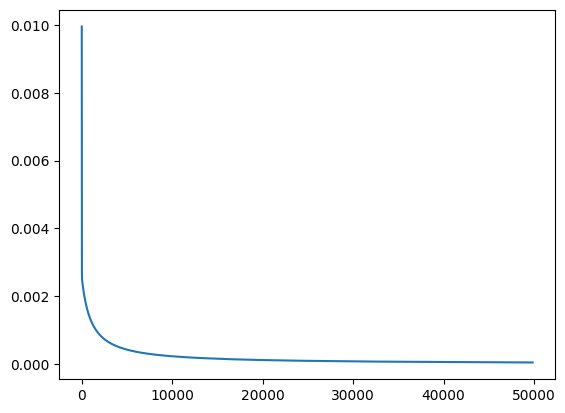

In [14]:

for i in range(10000):
    linear = inputs @ weights + bias
    nonlinear = tanh(linear)
    loss1 = nonlinear - tensor(trainy)
    loss2 = loss1**2
    loss3 = sum(loss2)
    if i % 100:
        stats.append(loss3.data)

    for p in parameters:
        p.grad = None


    loss3.backward()
    lr = 0.05
    for p in parameters:
        p.data = p.data - (lr * p.grad.data)

print( trainx, "\n", trainy, "\n", nonlinear, "\n", loss1, "\n", loss2, "\n", loss3, "\n", weights, "\n", bias )
for p in parameters:
    print(p.grad)
plt.plot(stats)

In [20]:
linear = tensor([0.0, 0.0]) @ weights + bias
nonlinear = tanh(linear)
nonlinear

tensor([9.8848e-05], grad_fn=<TanhBackward0>)

In [24]:
linear = tensor([1.0, 0.0]) @ weights + bias
nonlinear = tanh(linear)
nonlinear

tensor([0.9950], grad_fn=<TanhBackward0>)

In [25]:
linear = tensor([0.0, 1.0]) @ weights + bias
nonlinear = tanh(linear)
nonlinear

tensor([0.9950], grad_fn=<TanhBackward0>)

In [26]:
linear = tensor([1.0, 1.0]) @ weights + bias
nonlinear = tanh(linear)
nonlinear

tensor([1.0000], grad_fn=<TanhBackward0>)